# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


*In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 

*To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), 

*the [OpenWeatherMap API](https://openweathermap.org/api), 

*and a little common sense to create a representative model of weather across world cities.


In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

In [111]:
cities_df = pd.DataFrame(cities, columns = ['city'])
cities_df

,city
0,bredasdorp
1,rikitea
2,east london
3,busselton
4,leningradskiy
...,...
606,tessalit
607,vezirkopru
608,koutiala
609,christchurch


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

weather_query_url = f"{base_url}&APPID={weather_api_key}"


#print(weather_query_url)

In [158]:
# Get weather data
# use iterrows to iterate through pandas dataframe
temperature = []
index = []

cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


Error_count = 0
for index, row in cities_df.iterrows():

    # get city name from df
    city_name = row['city']
    
    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name}.")
    weather_json = requests.get(weather_query_url + "&q="+ city_name +"&units="+units).json()
    #pprint(weather_json)
    
    ##extract results
    try:
        #Cloudiness
        cloudiness = weather_json["clouds"]["all"]
        cities_df.loc[index, 'cloudiness'] = cloudiness
        #Country
        country = weather_json["sys"]["country"]
        cities_df.loc[index, 'country'] = country
        #date
        date = weather_json["dt"]
        cities_df.loc[index, 'date'] = date
        #humidity
        humidity = weather_json["main"]["humidity"]
        cities_df.loc[index, 'humidity'] = humidity
        #latitude
        latitude = weather_json["coord"]["lat"]
        cities_df.loc[index, 'latitude'] = latitude
        #longitude
        longitude = weather_json["coord"]["lon"]
        cities_df.loc[index, 'longitude'] = longitude
        #Max Temp
        max_temp = weather_json["main"]["temp_max"]
        cities_df.loc[index, 'max_temp'] = max_temp
        #wind_speed
        wind_speed = weather_json["wind"]["speed"]
        cities_df.loc[index, 'wind_speed'] = wind_speed
        
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    print("------------")

Retrieving Results for Index 0: bredasdorp.
------------
Retrieving Results for Index 1: rikitea.
------------
Retrieving Results for Index 2: east london.
------------
Retrieving Results for Index 3: busselton.
------------
Retrieving Results for Index 4: leningradskiy.
------------
Retrieving Results for Index 5: norman wells.
------------
Retrieving Results for Index 6: upernavik.
------------
Retrieving Results for Index 7: tautira.
------------
Retrieving Results for Index 8: puerto ayora.
------------
Retrieving Results for Index 9: vaini.
------------
Retrieving Results for Index 10: chuy.
------------
Retrieving Results for Index 11: dikson.
------------
Retrieving Results for Index 12: torbay.
------------
Retrieving Results for Index 13: cape town.
------------
Retrieving Results for Index 14: pawai.
------------
Retrieving Results for Index 15: ushuaia.
------------
Retrieving Results for Index 16: katsuura.
------------
Retrieving Results for Index 17: belcesti.
-----------

------------
Retrieving Results for Index 139: ketchikan.
------------
Retrieving Results for Index 140: haibowan.
Missing field/result... skipping.
------------
Retrieving Results for Index 141: acajutla.
------------
Retrieving Results for Index 142: axim.
------------
Retrieving Results for Index 143: merrill.
------------
Retrieving Results for Index 144: bambous virieux.
------------
Retrieving Results for Index 145: ouadda.
------------
Retrieving Results for Index 146: cap malheureux.
------------
Retrieving Results for Index 147: wexford.
------------
Retrieving Results for Index 148: high prairie.
------------
Retrieving Results for Index 149: itaituba.
------------
Retrieving Results for Index 150: airai.
------------
Retrieving Results for Index 151: payakumbuh.
------------
Retrieving Results for Index 152: safford.
------------
Retrieving Results for Index 153: carnarvon.
------------
Retrieving Results for Index 154: arraial do cabo.
------------
Retrieving Results for In

------------
Retrieving Results for Index 278: dickson.
------------
Retrieving Results for Index 279: kautokeino.
------------
Retrieving Results for Index 280: cordoba.
------------
Retrieving Results for Index 281: flinders.
------------
Retrieving Results for Index 282: terrace bay.
------------
Retrieving Results for Index 283: corn island.
------------
Retrieving Results for Index 284: kibondo.
------------
Retrieving Results for Index 285: miri.
------------
Retrieving Results for Index 286: mampong.
------------
Retrieving Results for Index 287: kungurtug.
------------
Retrieving Results for Index 288: danielskuil.
------------
Retrieving Results for Index 289: boa vista.
------------
Retrieving Results for Index 290: yar-sale.
------------
Retrieving Results for Index 291: belyy yar.
------------
Retrieving Results for Index 292: ponta do sol.
------------
Retrieving Results for Index 293: waco.
------------
Retrieving Results for Index 294: moorhead.
------------
Retrieving R

Missing field/result... skipping.
------------
Retrieving Results for Index 417: lazdijai.
------------
Retrieving Results for Index 418: mayor pablo lagerenza.
------------
Retrieving Results for Index 419: talnakh.
------------
Retrieving Results for Index 420: manbij.
------------
Retrieving Results for Index 421: ambovombe.
------------
Retrieving Results for Index 422: pyinmana.
------------
Retrieving Results for Index 423: aflu.
Missing field/result... skipping.
------------
Retrieving Results for Index 424: chingirlau.
------------
Retrieving Results for Index 425: nauen.
------------
Retrieving Results for Index 426: port macquarie.
------------
Retrieving Results for Index 427: beloha.
------------
Retrieving Results for Index 428: ucluelet.
------------
Retrieving Results for Index 429: praia da vitoria.
------------
Retrieving Results for Index 430: binzhou.
------------
Retrieving Results for Index 431: benguela.
------------
Retrieving Results for Index 432: saint-joseph.

------------
Retrieving Results for Index 556: price.
------------
Retrieving Results for Index 557: thisted.
------------
Retrieving Results for Index 558: rabo de peixe.
------------
Retrieving Results for Index 559: qom.
------------
Retrieving Results for Index 560: salinas.
------------
Retrieving Results for Index 561: phan thiet.
------------
Retrieving Results for Index 562: narasannapeta.
------------
Retrieving Results for Index 563: cascas.
------------
Retrieving Results for Index 564: avera.
------------
Retrieving Results for Index 565: sumbawa.
Missing field/result... skipping.
------------
Retrieving Results for Index 566: sabha.
------------
Retrieving Results for Index 567: juneau.
------------
Retrieving Results for Index 568: hazorasp.
------------
Retrieving Results for Index 569: fort frances.
------------
Retrieving Results for Index 570: nishihara.
------------
Retrieving Results for Index 571: tual.
------------
Retrieving Results for Index 572: razole.
-------

In [159]:
cities_df.index.names = ["city_ID"]

cities_df["date"] = pd.to_datetime(cities_df['date'],unit='s')

In [160]:
cities_df['date'] = cities_df['date'].dt.strftime('%m/%d/%Y')

cities_df

,city,cloudiness,country,date,humidity,latitude,longitude,max_temp,wind_speed
city_ID,,,,,,,,,
0,bredasdorp,2.0,ZA,04/12/2020,76.0,-34.53,20.04,53.60,58.61
1,rikitea,45.0,PF,04/12/2020,78.0,-23.12,-134.97,77.95,17.87
2,east london,0.0,ZA,04/12/2020,65.0,-33.02,27.91,64.85,12.24
3,busselton,67.0,AU,04/12/2020,71.0,-33.65,115.33,62.01,5.99
4,leningradskiy,89.0,RU,04/12/2020,86.0,69.38,178.42,21.27,2.77
...,...,...,...,...,...,...,...,...,...
606,tessalit,35.0,ML,04/12/2020,17.0,20.20,1.01,83.12,2.35
607,vezirkopru,78.0,TR,04/12/2020,74.0,41.14,35.45,30.20,3.36
608,koutiala,67.0,ML,04/12/2020,32.0,12.39,-5.46,89.69,1.36


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [163]:
cities_df.to_csv('/Users/jenniferramsey/hw/Python_API/output_data/cities.csv', index=True) 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

04/12/2020


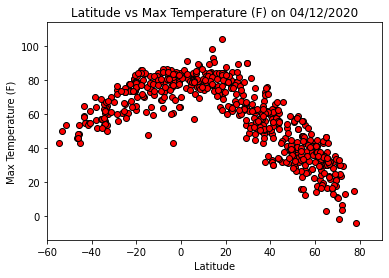

In [164]:
date = cities_df['date'].unique()
print(date[0])

x_axis = cities_df['latitude']
y_axis = cities_df['max_temp']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['max_temp'].min() - 10), (cities_df['max_temp'].max() + 10))
plt.title('Latitude vs Max Temperature (F) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/latitudeVtemp.png')

plt.show()
##Measuring the relationship between Latitude (Distance from the equator) and the Max Temp for the region.
##The closer the city is to the equator (lat = 0), the higher the temperature.

#### Latitude vs. Humidity Plot

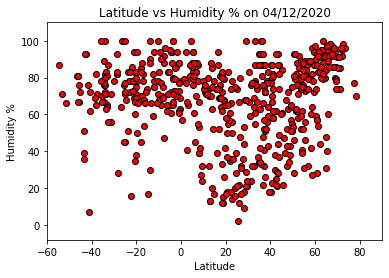

In [165]:
x_axis = cities_df['latitude']
y_axis = cities_df['humidity']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['humidity'].min() - 10), (cities_df['humidity'].max() + 10))
plt.title('Latitude vs Humidity % on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/latitudeVhumidity.png')

plt.show()

##measuring the relationship between Latitude and Humidity.
##there does not appear to be any strong relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

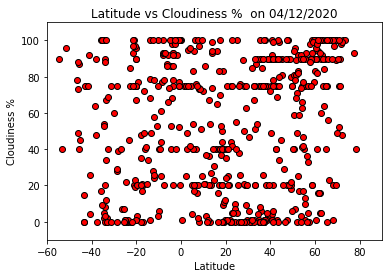

In [166]:
x_axis = cities_df['latitude']
y_axis = cities_df['cloudiness']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['cloudiness'].min() - 10), (cities_df['cloudiness'].max() + 10))
plt.title('Latitude vs Cloudiness %  on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/latitudeVcloudiness.png')

plt.show()

#measuring the relationship between latitude and cloudiness.
##there does not appear to be a strong relationship between latitude and cloudiness

#### Latitude vs. Wind Speed Plot

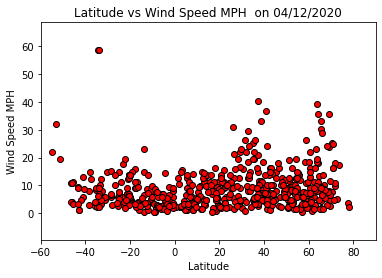

In [167]:
x_axis = cities_df['latitude']
y_axis = cities_df['wind_speed']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['wind_speed'].min() - 10), (cities_df['wind_speed'].max() + 10))
plt.title('Latitude vs Wind Speed MPH  on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/latitudeVwind.png')

plt.show()

#measuring the relationship between latitude and wind speed.
##there does not appear to be a significant relationship between latitude and wind speed,
#but the data may support stronger winds closer to the poles

## Linear Regression

In [168]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_df[cities_df.latitude >= 0]
#northern_hemisphere

southern_hemisphere = cities_df[cities_df.latitude < 0]
#southern_hemisphere

#southern_hemisphere['latitude'].max(), northern_hemisphere['latitude'].min()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

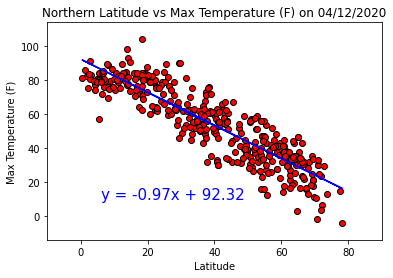

In [169]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['max_temp'].min() - 10), (northern_hemisphere['max_temp'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Max Temperature (F) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/NORTHlatitudeVtemp.png')

plt.show()

##measuring the relationship between latitude and temperature in the NORTHERN hemisphere.
##There is a relationship of decrease of temperature as latitude increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

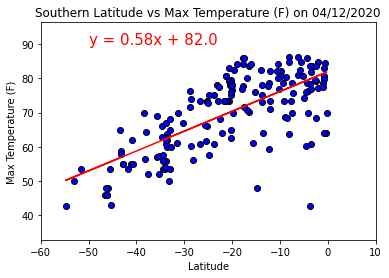

In [170]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['max_temp'].min() - 10), (southern_hemisphere['max_temp'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title('Southern Latitude vs Max Temperature (F) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/SOUTHlatitudeVtemp.png')

plt.show()

##measuring the relationship between latitude and temperature in the SOUTHERN hemisphere.
##There is a relationship of decrease of temperature as latitude decreases,
##though not as sharply as in the north.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

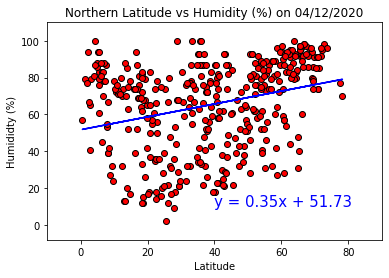

In [171]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['humidity'].min() - 10), (northern_hemisphere['humidity'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(40,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Humidity (%) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Humididty (%)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/NORTHlatitudeVhumidity.png')

plt.show()
##measuring the relationship between Latitude and Humidity in the NORTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, Humdity rises slightly.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

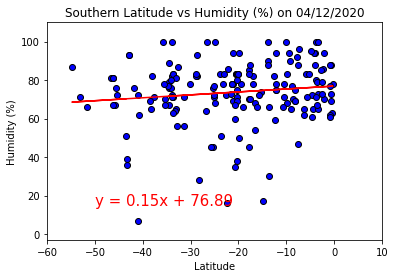

In [172]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['humidity'].min() - 10), (southern_hemisphere['humidity'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title('Southern Latitude vs Humidity (%) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/SOUTHlatitudeVhumidity.png')

plt.show()

##measuring the relationship between Latitude and Humidity in the SOUTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, Humdity rises slightly.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

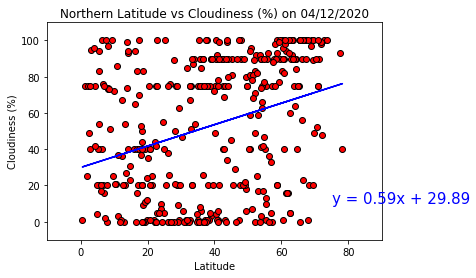

In [173]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['cloudiness'].min() - 10), (northern_hemisphere['cloudiness'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(75,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Cloudiness (%) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/NORTHlatitudeVcloudiness.png')

plt.show()

##measuring the relationship between Latitude and Cloudiness in the NORTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, cloudiness rises slightly.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

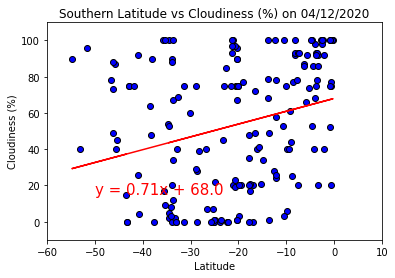

In [174]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['cloudiness'].min() - 10), (southern_hemisphere['cloudiness'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title('Southern Latitude vs Cloudiness (%) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/SOUTHlatitudeVcloudiness.png')

plt.show()

##measuring the relationship between Latitude and Cloudiness in the SOUTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, cloudiness rises slightly.



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

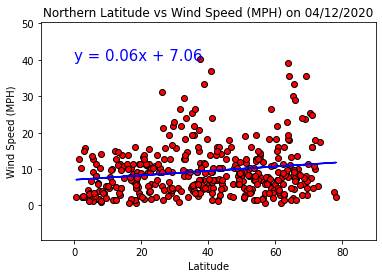

In [175]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['wind_speed'].min() - 10), (northern_hemisphere['wind_speed'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(0,40),fontsize=15,color="blue")
plt.title('Northern Latitude vs Wind Speed (MPH) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/NORTHlatitudeVwind.png')

plt.show()

##measuring the relationship between Latitude and Windspeer in the NORTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, wind speed rises somewhat.




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

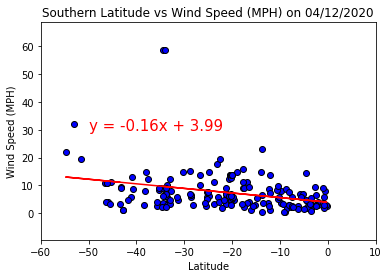

In [176]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['wind_speed'].min() - 10), (southern_hemisphere['wind_speed'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('Southern Latitude vs Wind Speed (MPH) on ' + str(date[0]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

plt.savefig('/Users/jenniferramsey/hw/Python_API/output_data/SOUTHlatitudeVwind.png')


plt.show()

##measuring the relationship between Latitude and Windspeer in the SOUTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, wind speed decreases the tiniest bit.

